# Analysis of the Coronawiki dataset

### Load the different files

In [1]:
import pandas as pd
import json
import gzip
 


path = 'data/'

#Load csv files
df_interventions = pd.read_csv(path + 'interventions.csv')
df_google_mobility = pd.read_csv(path + 'Global_Mobility_Report.csv.gz')
df_apple_mobility = pd.read_csv(path + 'applemobilitytrends-2020-04-20.csv')
df_topics_linked = pd.read_csv(path + 'topics_linked.csv.xz')

#Load the (gzipped) json file
with gzip.open(path + 'aggregated_timeseries.json.gz', "rb") as f:
    json_timeseries = json.loads(f.read().decode("ascii"))



/var/folders/k1/2j7pp08d18s0pl6k1zjtbxd40000gn/T/ipykernel_14100/3222714998.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_google_mobility = pd.read_csv(path + 'Global_Mobility_Report.csv.gz')


## Study each dataframe

### Interventions dataframe

In [2]:
#Dataframe overview

df_interventions.head(20)

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaN,2020-03-16,2020-05-29
5,no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04
6,sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02
7,sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaN,2020-03-11,2020-06-05
8,ko,2020-01-20,2020-02-20,2020-02-23,NaN,NaN,2020-02-25,2020-04-15
9,ca,2020-01-31,2020-02-13,2020-03-12,2020-03-08,2020-03-14,2020-03-16,NaN


In [3]:
#Countries considered in this dataset

print (df_interventions.shape[0], 'countries considered :')

for ctry in df_interventions['lang'] :
    print (ctry, end='  ')

14 countries considered :
fr  da  de  it  nl  no  sr  sv  ko  ca  fi  ja  en  tr  

### Apple mobility report

In [4]:
#Dataframe overview

df_apple_mobility.head(3)

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67


In [5]:
#Min and max dates of this dataset

apple_cols = df_apple_mobility.columns
print ('Reference day :', apple_cols[3])
print ('Last day :', apple_cols[-1])

Reference day : 2020-01-13
Last day : 2020-04-20


In [6]:
#Regions considered

#Number of cities and country/region considered
print (df_apple_mobility['geo_type'].value_counts(), '\n')

#Regions considered
apple_regions = df_apple_mobility[df_apple_mobility['geo_type']=='country/region']['region']
print ('Regions : \n', apple_regions.unique(), '\n')

#Count the regions where the data is for walking, driving and transit
occurence_counting = apple_regions.value_counts()
print('Nb of regions with data for walking, driving and transit :', occurence_counting[occurence_counting==3].shape[0])
print('Nb of regions with data for only walking and driving :', occurence_counting[occurence_counting==2].shape[0], '\n')

#Cities considered
apple_cities = df_apple_mobility[df_apple_mobility['geo_type']=='city']['region']
print ('Cities : \n', apple_cities.unique(), '\n')

#Count the regions where the data is for walking, driving and transit
occurence_counting = apple_cities.value_counts()
print('Nb of cities with data for walking, driving and transit :', occurence_counting[occurence_counting==3].shape[0])
print('Nb of cities with data for only walking and driving :', occurence_counting[occurence_counting==2].shape[0], '\n')


city              242
country/region    153
Name: geo_type, dtype: int64 

Regions : 
 ['Albania' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria'
 'Cambodia' 'Canada' 'Chile' 'Colombia' 'Croatia' 'Czech Republic'
 'Denmark' 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Latvia' 'Lithuania' 'Luxembourg' 'Macao' 'Malaysia'
 'Mexico' 'Morocco' 'Netherlands' 'New Zealand' 'Norway' 'Philippines'
 'Poland' 'Portugal' 'Republic of Korea' 'Romania' 'Russia' 'Saudi Arabia'
 'Serbia' 'Singapore' 'Slovakia' 'Slovenia' 'South Africa' 'Spain'
 'Sweden' 'Switzerland' 'Taiwan' 'Thailand' 'Turkey' 'UK' 'United States'
 'Ukraine' 'United Arab Emirates' 'Uruguay' 'Vietnam'] 

Nb of regions with data for walking, driving and transit : 27
Nb of regions with data for only walking and driving : 36 

Cities : 
 ['Amsterdam' 'Athens' 'Atlanta' 'Auckland' 'Baltimore' 'Bangkok'
 'Barcelona' 'Berlin

/var/folders/k1/2j7pp08d18s0pl6k1zjtbxd40000gn/T/ipykernel_14100/3230671932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_walking.drop(['geo_type', 'region', 'transportation_type'], inplace=True, axis=1)


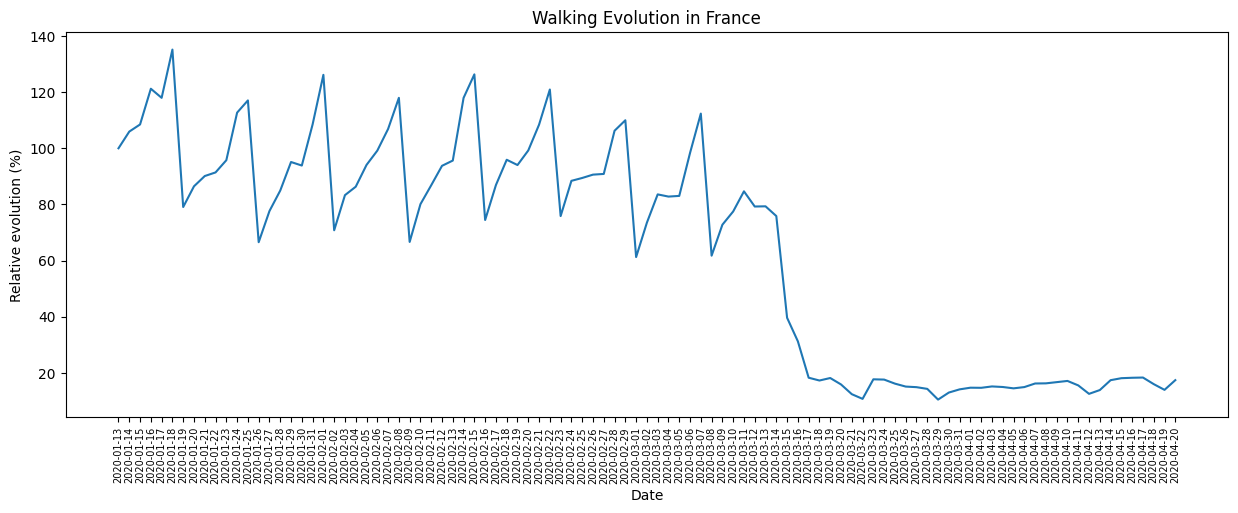

In [7]:
#Exemple : plot walking evolution in France

import matplotlib.pyplot as plt

#Extract walking data for France
france_walking = df_apple_mobility[(df_apple_mobility['region']=='France') & (df_apple_mobility['transportation_type']=='walking')]
france_walking.drop(['geo_type', 'region', 'transportation_type'], inplace=True, axis=1)

#Transpose it to have a pandas series and plot it
france_walking = france_walking.transpose()
fig = plt.figure(figsize=(15, 5))
plt.plot(france_walking)
plt.xticks(fontsize=7, rotation=90)
plt.title('Walking Evolution in France')
plt.xlabel('Date')
plt.ylabel('Relative evolution (%)')
plt.show()

### Google mobility report

In [8]:
#Overview of the dataset

df_google_mobility.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


In [9]:
#Countries for which we have data
google_countries = df_google_mobility['country_region'].unique()
print ('Data for', google_countries.size, 'countries :')
print (google_countries)

Data for 135 countries :
['United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda' 'Angola'
 'Argentina' 'Austria' 'Australia' 'Aruba' 'Bosnia and Herzegovina'
 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso' 'Bulgaria' 'Bahrain'
 'Benin' 'Bolivia' 'Brazil' 'The Bahamas' 'Botswana' 'Belarus' 'Belize'
 'Canada' 'Switzerland' "Côte d'Ivoire" 'Chile' 'Cameroon' 'Colombia'
 'Costa Rica' 'Cape Verde' 'Czechia' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Estonia' 'Egypt' 'Spain' 'Finland' 'Fiji'
 'France' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Guatemala'
 'Guinea-Bissau' 'Hong Kong' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'Ireland' 'Israel' 'India' 'Iraq' 'Italy' 'Jamaica' 'Jordan'
 'Japan' 'Kenya' 'Kyrgyzstan' 'Cambodia' 'South Korea' 'Kuwait'
 'Kazakhstan' 'Laos' 'Lebanon' 'Liechtenstein' 'Sri Lanka' 'Lithuania'
 'Luxembourg' 'Latvia' 'Libya' 'Morocco' 'Moldova' 'North Macedonia'
 'Mali' 'Myanmar (Burma)' 'Mongolia' 'Malta' 'Mauritius' 'Mexico'
 'Malay

In [10]:
#The data can be at a more specific scale than the whole country
#For instance in France, the different regions are considered

google_mob_france = df_google_mobility[df_google_mobility['country_region'] == 'France']
print ('Regions considered in France')
print (google_mob_france['sub_region_1'].unique(), '\n')

#Let's now focus on Occitanie
print ('Subregions in Occitanie :')
google_mob_occ = google_mob_france[google_mob_france['sub_region_1'] == 'Occitanie']
print (google_mob_occ['sub_region_2'].unique())

#In occitanie let's focus on Haute-Garonne
google_mob_hg = google_mob_occ[google_mob_france['sub_region_2'] == 'Haute-Garonne']

Regions considered in France
[nan 'Auvergne-Rhône-Alpes' 'Bourgogne-Franche-Comté' 'Brittany'
 'Centre-Val de Loire' 'Corsica' 'Grand Est' 'Hauts-de-France'
 'Île-de-France' 'Normandy' 'Nouvelle-Aquitaine' 'Occitanie'
 'Pays de la Loire' "Provence-Alpes-Côte d'Azur"] 

Subregions in Occitanie :
[nan 'Ariege' 'Aude' 'Aveyron' 'Gard' 'Gers' 'Haute-Garonne'
 'Hautes-Pyrénées' 'Hérault' 'Lot' 'Lozère' 'Pyrénées-Orientales' 'Tarn'
 'Tarn-et-Garonne']


/var/folders/k1/2j7pp08d18s0pl6k1zjtbxd40000gn/T/ipykernel_14100/1814930784.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  google_mob_hg = google_mob_occ[google_mob_france['sub_region_2'] == 'Haute-Garonne']


In [11]:
#Now let's see what data can be extracted in Haute-Garonne
print ('Columns of the dataframe :')
print (google_mob_hg.columns, '\n')

#Focus on the date
print ('Date range : ')
print ('from', google_mob_hg['date'].iloc[0], 'to', google_mob_hg['date'].iloc[-1], '\n')

#Specific places for which we have data
print ('Types of places considered :')
for col in google_mob_hg.columns :
    if '_percent_change_from_baseline' in col :
        print(' -',col.replace('_percent_change_from_baseline', ''))


Columns of the dataframe :
Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object') 

Date range : 
from 2020-02-15 to 2020-08-25 

Types of places considered :
 - retail_and_recreation
 - grocery_and_pharmacy
 - parks
 - transit_stations
 - workplaces
 - residential


### Analysis of the dataframe topics_linked

In [12]:
#print the shape and head of the dataframe

print ('Shape of the dataframe :', df_topics_linked.shape)
df_topics_linked.head()

Shape of the dataframe : (4306126, 66)


,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
0,Rosmalen,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2001490
1,Commelinales,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q290349
2,Transport_in_Honduras,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q1130638
3,QuakeC,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2122062
4,Food_writing,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q5465542


In [13]:
#Print the Wikipedia pages related to a specific topic

#Example for east Asia
topic = 'Geography.Regions.Asia.East Asia'
df_specific_topic = df_topics_linked[df_topics_linked[topic]==True]
print ('The', df_specific_topic.shape[0], 'Wikipedia pages related to', topic, 'are : \n')
print (df_specific_topic['index'])

The 148028 Wikipedia pages related to Geography.Regions.Asia.East Asia are : 

14                        Emperor_Kōtoku
41                                Datsun
58                  Chinese_food_therapy
86          Taiwan_independence_movement
104                   Ashikaga_Yoshiharu
                       ...              
4306064                         Fire_EX.
4306108                        Wu_Weihua
4306110    Seigan-ji_(Atsuta-ku,_Nagoya)
4306114          Kinoshita_Meister_Tokyo
4306125                         Qiao_Jie
Name: index, Length: 148028, dtype: object


### Analysis of the dictionary json_timeseries

In [14]:
# The coronawiki time series data are contained in the dictionary json_timeseries, let's see what is the structure of this dictionary
versions = list(json_timeseries.keys())
versions.sort()

print('The different versions of Wikipedia that are considered are:')
print(versions)

print('We have the visit history on '+str(int(len(versions)/2))+' different versions of Wikipedia, for each of these versions there are two keys one for the normal version and one for the mobile version .m ')

The different versions of Wikipedia that are considered are:
['ca', 'ca.m', 'da', 'da.m', 'de', 'de.m', 'en', 'en.m', 'fi', 'fi.m', 'fr', 'fr.m', 'it', 'it.m', 'ja', 'ja.m', 'ko', 'ko.m', 'nl', 'nl.m', 'no', 'no.m', 'sr', 'sr.m', 'sv', 'sv.m', 'tr', 'tr.m']
We have the visit history on 14 different versions of Wikipedia, for each of these versions there are two keys one for the normal version and one for the mobile version .m 


In [15]:
# Now let's see what is the structure inside one of these version, the german one for example
german = json_timeseries['de']
print('The keys for the german version, and for all other versions are:')
print(list(german.keys()))

The keys for the german version, and for all other versions are:
['len', 'sum', 'covid', 'topics']


In [16]:
# The key len gives the number of Wikipedia pages for this version
print('key len: The german version of Wikipedia contains '+str(int(german['len']))+' pages \n')

key len: The german version of Wikipedia contains 2415136 pages 



In [17]:
# The key sum gives the number of daily visits to all pages between 01-01-2018 and 07-31-2020
total_visits = german['sum']
print('key sum: The daily number of visits for these pages during the ten first days of 2018 are:')
print(list(total_visits.values())[:10])
print('\n')

key sum: The daily number of visits for these pages during the ten first days of 2018 are:
[9287425, 14474378, 15758306, 15069599, 13997127, 11238963, 13349559, 16927810, 16511909, 16352163]




In [18]:
# Now let's see what is inside the key covid
covid_visits = german['covid']
print('The key covid contains 3 sub-keys: ')
print(list(covid_visits.keys()))
# First, the number of pages that are considered to be linked with COVID-19 is in the key len
print('key len: ' + str(covid_visits['len'])+' pages are linked with COVID-19')
# Then, the key sum gives the number of daily visits to pages linked with COVID-19 between 01-01-2018 and 07-31-2020
print('key sum: The daily number of visits for COVID-19 related pages during the ten first days of 2018 are:')
print(list(covid_visits['sum'].values())[:10])
# Finally, the key percent gives the proportion of COVID-related visits to total visits
print('key percent: The proportion of COVID-related visits to total visits during the ten first days of 2018 are:')
print(list(covid_visits['percent'].values())[:10])
print('\n')

The key covid contains 3 sub-keys: 
['len', 'sum', 'percent']
key len: 77 pages are linked with COVID-19
key sum: The daily number of visits for COVID-19 related pages during the ten first days of 2018 are:
[160, 209, 219, 216, 334, 136, 238, 325, 351, 330]
key percent: The proportion of COVID-related visits to total visits during the ten first days of 2018 are:
[1.7227595377620814e-05, 1.4439307858341132e-05, 1.3897432883966082e-05, 1.4333493545515046e-05, 2.3862039688573235e-05, 1.2100760541697663e-05, 1.7828304290800916e-05, 1.9199175794151754e-05, 2.1257384594355505e-05, 2.0180816446117863e-05]




In [19]:
# Finally the key topics contains a sub-key for each topic that are detailed in the dataframe df_topics_linked.
print('key topics: '+str(len(german['topics'].keys())) + ' topics are considered in this version')
# Inside one of these topics the structure is the same as in the key covid:
print('Structure of a topic: ') 
print(list(german['topics']['Culture.Biography.Biography*'].keys()))
print('\n')
# First, the number of pages that are considered to be linked with this topic is in the key len
print('key len: ' + str(german['topics']['Culture.Biography.Biography*']['len'])+' pages are linked with biography \n')
# Then, the key sum gives the number of daily visits to pages linked with this topic between 01-01-2018 and 07-31-2020
print('key sum: The daily number of visits for pages related to biography during the ten first days of 2018 are:')
print(list(german['topics']['Culture.Biography.Biography*']['sum'].values())[:10])
print('\n')
# Finally, the key percent gives the proportion of visits related to this topic to total visits
print('key percent: The proportion of visits related to biography to total visits during the ten first days of 2018 are:')
print(list(german['topics']['Culture.Biography.Biography*']['percent'].values())[:10])

key topics: 64 topics are considered in this version
Structure of a topic: 
['len', 'sum', 'percent']


key len: 366688 pages are linked with biography 

key sum: The daily number of visits for pages related to biography during the ten first days of 2018 are:
[2205007, 2925728, 3098499, 2800005, 2682927, 2311069, 2803648, 3181377, 2921518, 2848499]


key percent: The proportion of visits related to biography to total visits during the ten first days of 2018 are:
[0.10350817913871328, 0.09235827140634287, 0.08880387037685927, 0.08467724704963073, 0.08678636048761482, 0.09125922639363901, 0.09235812518192289, 0.08462585718747359, 0.08100617057201899, 0.0796176462170131]


The structure of the dictionary json_timeseries can be shown with the following graph:

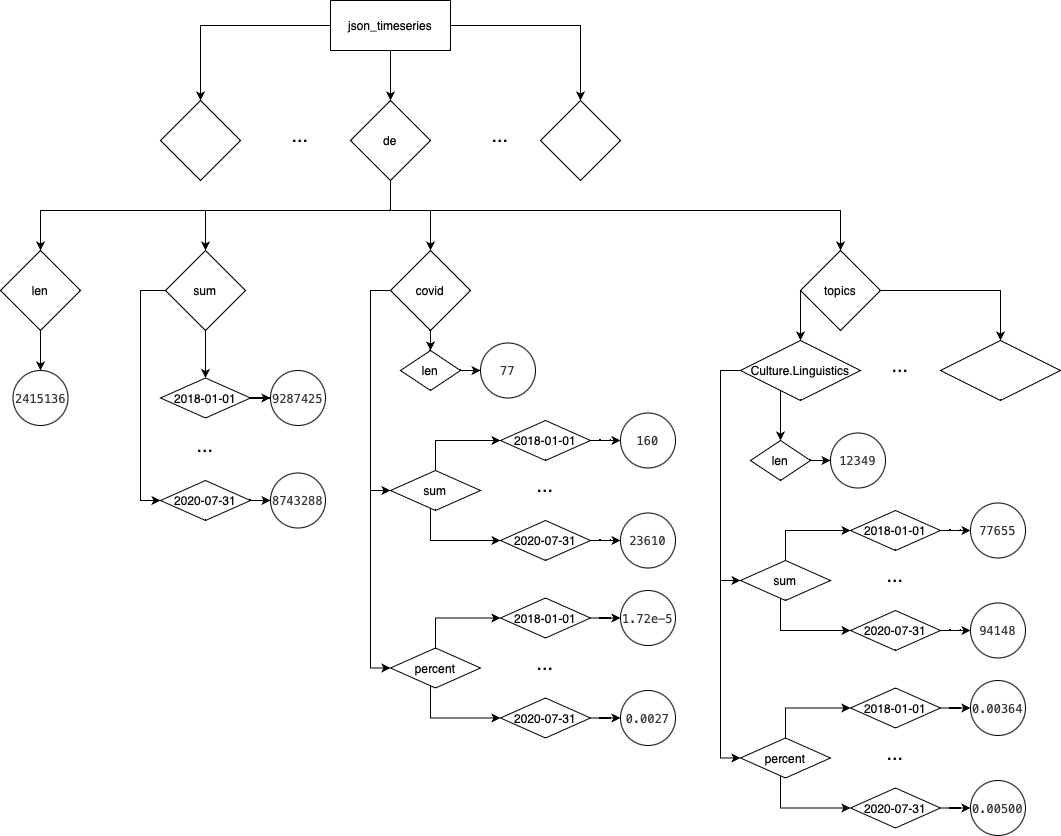

In [20]:
from IPython.display import Image
Image("json.png")

# First analysis of the evolution of interests

<BarContainer object of 64 artists>

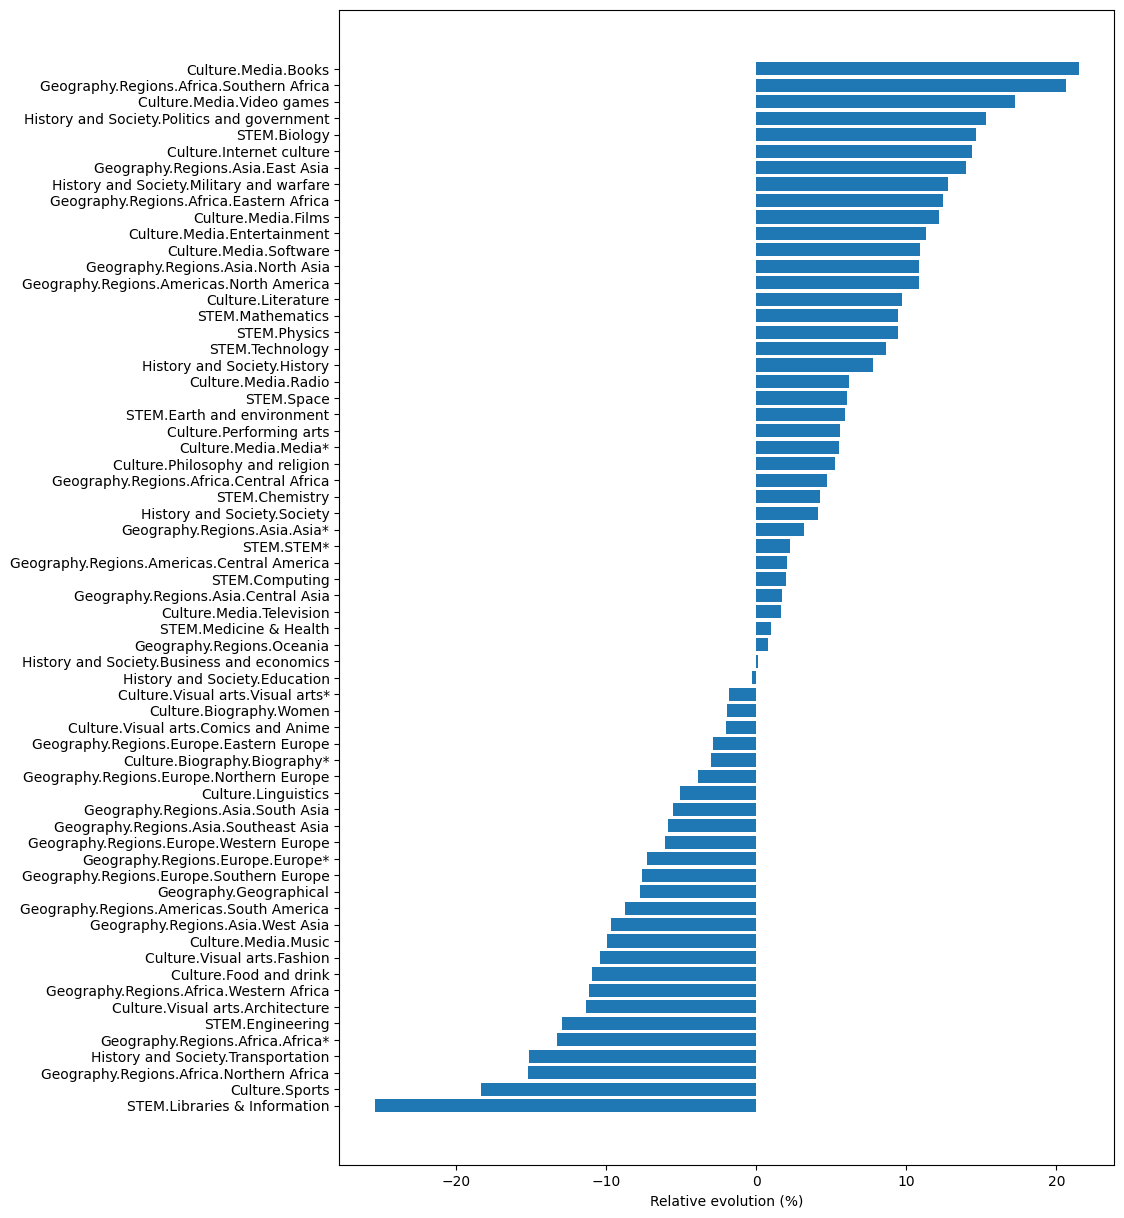

In [21]:
#Here we want to plot how each topic evolved during the pandemics with respect to the normal

# Let's put in the list time the list of the days of the considered period
time = list(json_timeseries['it']['topics']['Culture.Sports']['sum'].keys())
# We just remove the hours
time = [t[:10] for t in time]

# Thanks to the dataframe df_interventions we can get the dates of the lockdown in Italy
lockdown_start = df_interventions.loc[df_interventions['lang'] == 'it']['Lockdown'].to_list()
lockdown_end = df_interventions.loc[df_interventions['lang'] == 'it']['Normalcy'].to_list()

# We compute the index of these dates in the list of the days
start_index = time.index(lockdown_start[0])
end_index = time.index(lockdown_end[0])

#Create an empty dataframe which will contain the relative evolution for each topic
df = pd.DataFrame({'topic' : [], 'evolution' : []})

#For each topic, compute its evolution and add it to the dataframe
for topic in json_timeseries['it']['topics'].keys() :
    topic_m = pd.Series(list(json_timeseries['it.m']['topics'][topic]['percent'].values()))
    topic_normal = pd.Series(list(json_timeseries['it']['topics'][topic]['percent'].values()))
    topic_all = topic_normal.add(topic_m)

    #Relative evolution : ratio between the relative topic interset during the pandemic vs before pandemic
    relative_evolution = topic_all[start_index:end_index].mean() / topic_all.mean()

    #Select only the topics where the evolution is strong
    threshold=0.0 #can be increased if you want only the topics which have change above the threshold
    if relative_evolution > 1+threshold or relative_evolution < 1-threshold:
        new_entry = [topic, (relative_evolution-1)*100]
        df.loc[df.shape[0]] = new_entry 

#Sort and plot the dataframe
df.sort_values(by=['evolution'], inplace=True)
plt.figure(figsize=(10, 15))
plt.xlabel('Relative evolution (%)')
plt.barh(df['topic'], df['evolution'])

On this plot, the observed trend seems to be that italians' interest during lockdown decreased overall for things that were forbidden (travelling and doing sports), and increased overall for things that were allowed (watching films and reading books). The Italians thus seem to have conformed to lockdown rather than to be interested in what was no longer accessible.
Nevertheless, there are some exceptions like the categories Southern and North Africa that have increased, or the category Music that has decreased.

To develop this work we should do the same kind of analysis for different countries, especially in countries where the lockdown conditions were different.


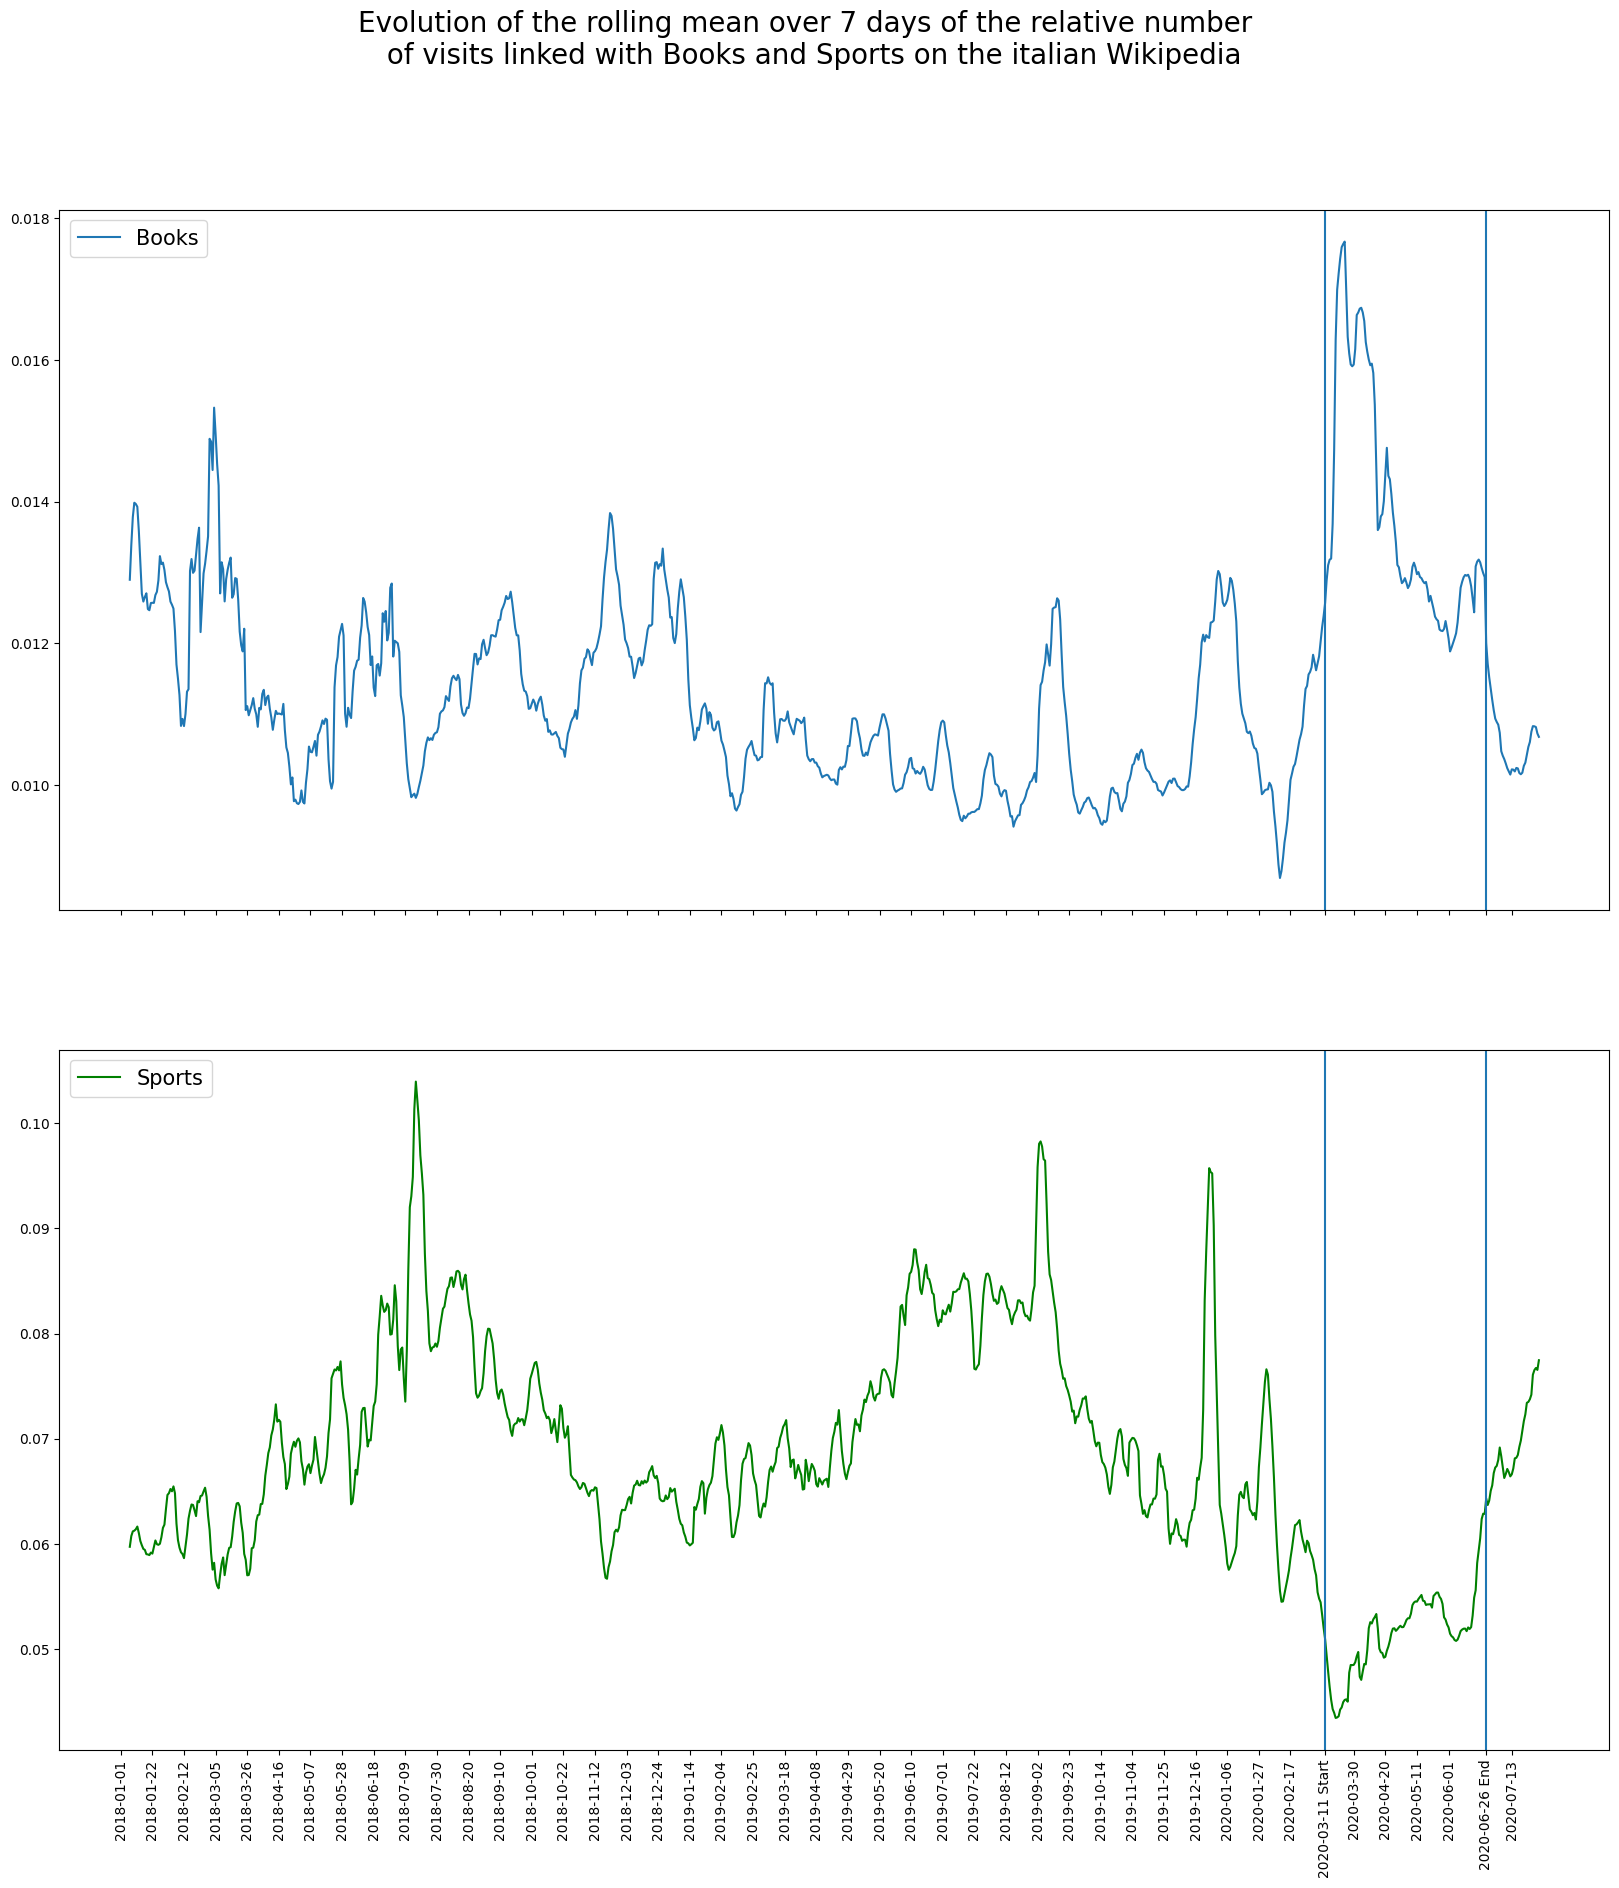

In [22]:
# Let's plot the evolution of the relative number of visits for two topics that have a large variation: Sports and Books

# For books and sports we create a list with the daily relative number of visits on the italian version linked to these topics
books = pd.Series(list(json_timeseries['it']['topics']['Culture.Media.Books']['percent'].values()))
sport = pd.Series(list(json_timeseries['it']['topics']['Culture.Sports']['percent'].values()))

# We do the same on the mobile version of the italian Wikipedia
books_m = pd.Series(list(json_timeseries['it.m']['topics']['Culture.Media.Books']['percent'].values()))
sport_m = pd.Series(list(json_timeseries['it']['topics']['Culture.Sports']['percent'].values()))

# For these two topics we add the values for the mobile and classic version
books_tot = books.add(books_m)
sport_tot = sport.add(sport_m)

# For the purpose of plotting our results we create a list of days with only 1 day in 21 and we also create a list of index for these days
time_reduced = [time[21*i] for i in range(int(len(time)/21)+1)]
time_pos = [21*i for i in range(int(len(time)/21)+1)]

# We add to the reduced list of days and the list of their index the dates of lockdowns in Italy
time_pos.append(start_index)
time_reduced.append(lockdown_start[0]+' Start')

time_pos.append(end_index)
time_reduced.append(lockdown_end[0]+' End')

# We also remove two points which are too close from the start/end of the lockdown to have a nice plot
time_pos.pop(time_reduced.index('2020-03-09'))
time_reduced.pop(time_reduced.index('2020-03-09'))

time_pos.pop(time_reduced.index('2020-06-22'))
time_reduced.pop(time_reduced.index('2020-06-22'))

fig, [ax1,ax2] = plt.subplots(2,1,figsize=(20,20),sharex=True)
ax1.plot(books_tot.rolling(7).mean(),label='Books')
ax2.plot(sport_tot.rolling(7).mean(),color='green',label='Sports')
ax2.set_xticks(time_pos,time_reduced,fontsize=10)
ax2.tick_params('x',labelrotation=90)
ax1.axvline(x=start_index)
ax1.axvline(x=end_index)
ax2.axvline(x=start_index)
ax2.axvline(x=end_index)
fig.suptitle('Evolution of the rolling mean over 7 days of the relative number \n of visits linked with Books and Sports on the italian Wikipedia',fontsize=20)

ax1.legend(fontsize=15)
ax2.legend(fontsize=15)

These two graphs confirm the previous results and give a better view of the overall evolution of interest in sport and books in Italy. Interest in books peaks (over the period considered) about a week after the start of the lockdown and remains higher overall during the lockdown than over the rest of the period. It is also clearly visible that this interest starts to decrease after several weeks of lockdown and eventually drops when the situation returns to normal. 

On the contrary, interest in sport reaches its lowest level about a week after lockdown, increases slowly over the weeks and then very quickly when returning to normal.

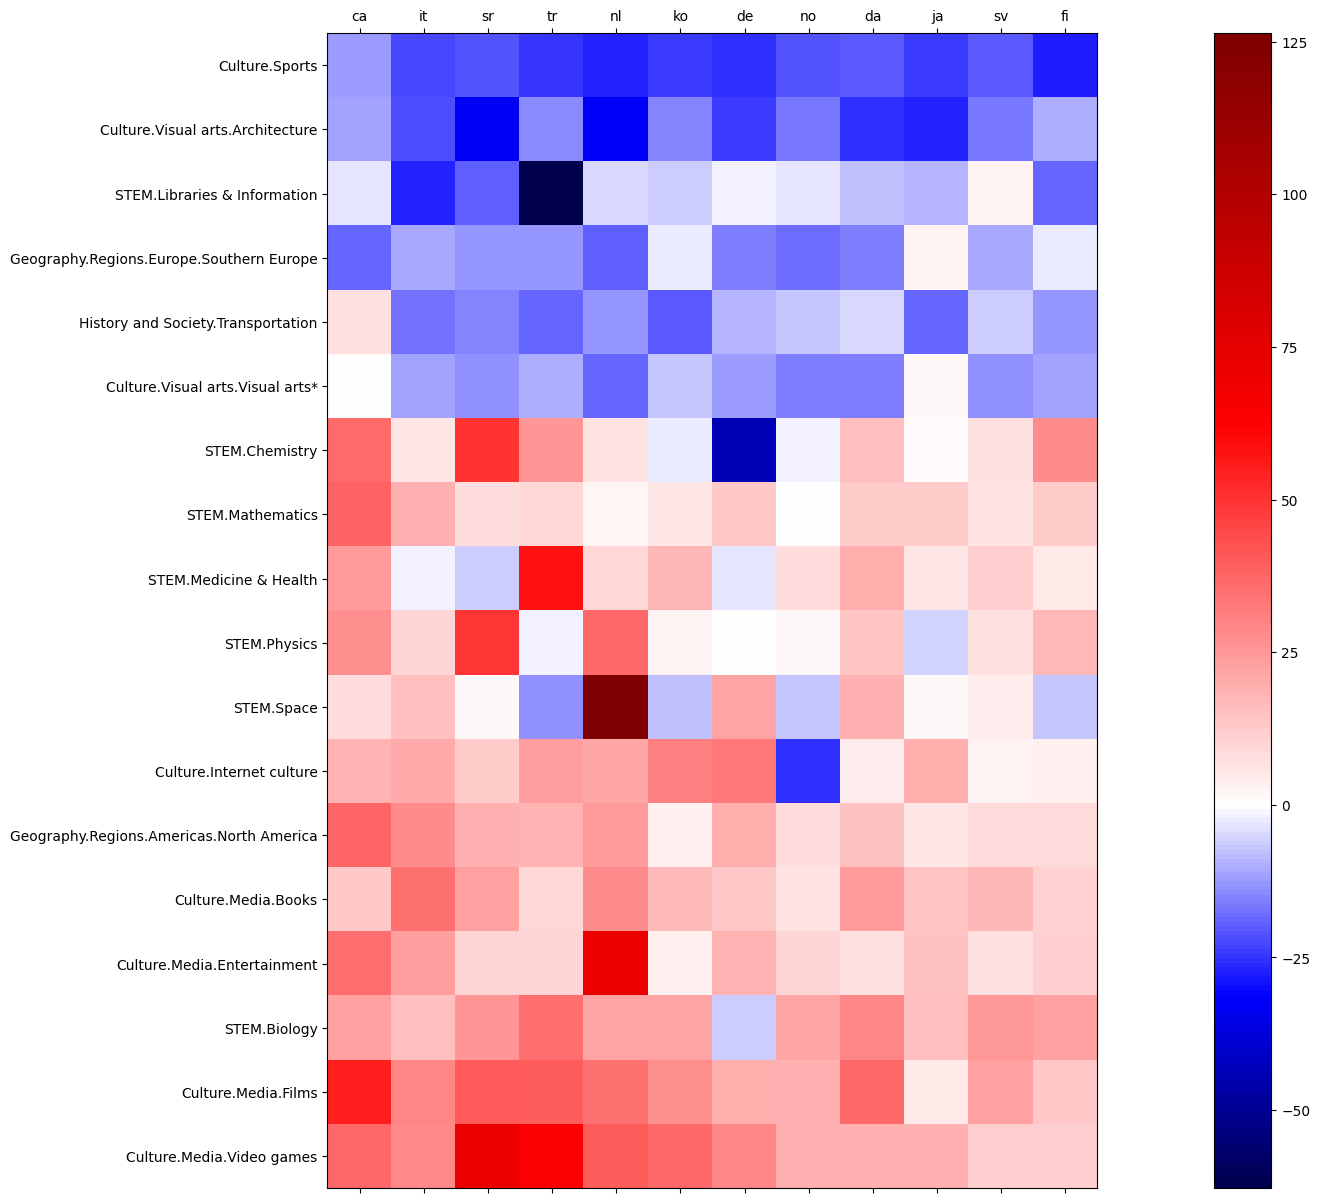

In [24]:
# Like the previous bar plot, the objective is here to be able to visualize the interest evolution of all the subjects but for each country and on the same figure, in a simple and clear way
# For this we will build a matrix whose color gradient will correspond to the interest evolution of a certain subject in a certain country
import datetime
import time
from datetime import date
import numpy as np
import matplotlib

# First we create a dataframe df_p4 with the data we need for this final part, the column versions contains the two letters corresponding the versions of Wikipedia that are considered, the column dem_index contains the democracy index of the corresponding countries and the column mobility shift contains the relative mobility shift computed previously.
versions = ['tr', 'sr', 'ja', 'it', 'ko', 'ca', 'nl', 'de', 'fi', 'no', 'sv', 'da']
dem_index = [0.11, 0.27, 0.74, 0.78, 0.79, 0.8, 0.81, 0.83, 0.83, 0.86, 0.88, 0.88]
mobility_shift = [-0.777, -0.785, -0.514, -0.904, -0.640 , -0.943, -0.657, -0.620, -0.416, -0.544, -0.418, -0.525]
dict = {'country': versions, 'democracy index': dem_index, 'mobility shift': mobility_shift}
df_p4 = pd.DataFrame(data = dict)

# To facilitate the building of the final matrix we sort the dataframe either with the democracy index or with the mobility shift
sort = 'mobility shift' # can be changed with 'dem_index' if we want the output as the function of the democracy index
df_p4 = df_p4.sort_values(sort) 
df_p4 = df_p4.reset_index(drop = True)

# Now we build a list period with all the days (with the datetime type) of the considered period
period = []
d0 = date(2018,1,1) # Day of start
d1 = date(2020,7,31) # Day of end
delta = datetime.timedelta(days=1) # Duration between two points: one day

while d0 <= d1:
    period.append(d0.strftime('%Y-%m-%d'))
    d0 += delta 

# Thanks to the dataframe df_interventions we can get the dates of the lockdown in every countries that we put in a new dataframe lockdown
lockdown = df_interventions.loc[df_interventions['lang'].isin(df_p4['country'])][['lang','Mobility','Normalcy']]

# There are two missing values: the return to normalcy in Catalonia and Turkey. We will assume that the return to normalcy is 2020-07-01 for these countries
lockdown.iloc[8,2] = '2020-07-01'
lockdown.iloc[11,2] = '2020-07-01'

# We compute the index of these dates in the list of the days and we put them in two new columns 'start_index' and 'end_index'
lockdown['start_index'] = [period.index(date) for date in lockdown['Mobility']]
lockdown['end_index'] = [period.index(date) for date in lockdown['Normalcy']]

# We create a dataframe where each row is characterized by a country in the column 'country', a topic in the column 'topic' and the relative evolution of interest for this topic in this country
df_evolution = pd.DataFrame({'country' : [], 'topic' : [], 'evolution' : []})
 
#For each topic and each country, we compute its evolution and add it to the dataframe
for d in df_p4['country']:
    for topic in json_timeseries[d]['topics'].keys() :
        # We get the daily data of the share of this topic in the global wikipedia searches in this country (mobile and desktop version)
        topic_percent_mobile = pd.Series(list(json_timeseries[d + '.m']['topics'][topic]['percent'].values()))
        topic_percent_desktop = pd.Series(list(json_timeseries[d]['topics'][topic]['percent'].values()))

        # We get the daily data of wikipedia visits related to this topic in this country (mobile and desktop version)
        topic_total_mobile = pd.Series(list(json_timeseries[d + '.m']['topics'][topic]['sum'].values()))
        topic_total_desktop = pd.Series(list(json_timeseries[d]['topics'][topic]['sum'].values()))

        # To know the proportion that this subject represents in the wikipedia visits we combine the data of the mobile version and the desktop version by making a weighted average of the two versions
        topic_all = (topic_percent_mobile * topic_total_mobile + topic_percent_desktop * topic_total_desktop) / (topic_total_mobile + topic_total_desktop)

        # We compute the relative evolution which is defined as the ratio between the average topic interest during the pandemic vs the average topic interest during the saeme period but one year before

        # Index of the day of the start and end of the lockdown in the list of the days
        start_index = lockdown.loc[lockdown['lang'] == d]['start_index'].tolist()[0]
        end_index = lockdown.loc[lockdown['lang'] == d]['end_index'].tolist()[0]

        relative_evolution = (topic_all[start_index:end_index].mean() -  topic_all[start_index - 365 : end_index - 365].mean()) / topic_all[start_index - 365 : end_index - 365].mean()

        # We create a new entry for the output dataframe with all the data needed
        new_entry = [d, topic, relative_evolution*100]
        df_evolution.loc[df_evolution.shape[0]] = new_entry 

# Now let's build the final matrix

# The number of rows in the number of different topics in the dataframe df_evolution
topics = list(set(df_evolution['topic'].tolist()))
nb_rows = len(topics)

# The number of columns is the number of countries
countries = df_p4['country']
nb_columns = len(countries)

# We create a matrix full of zeros with an additional column that will contain the average of all others columns
A = np.zeros((nb_rows, nb_columns + 1))

# Let's fill this matrix
for i in range(nb_rows):
    for j in range(nb_columns):
        # For each element of the matrix we retrieve the corresponding data in the DataFrame built previously
        A[i,j] = df_evolution.loc[(df_evolution['country'] == countries[j]) & (df_evolution['topic'] == topics[i])]['evolution'].tolist()[0]
    # The last column is the average evolution of the corresponding subject over all countries
    A[i,nb_columns] = sum([A[i,j] for j in range(nb_columns)]) / nb_columns

# Let's remove some topics whose evolution is not significant: if the average evolution is less than 10 we remove the corresponding row
# The threshold can be modified
removed_rows = []
for i in range(nb_rows):
    if abs(A[i, nb_columns]) <= 10:
        removed_rows.append(i)

A = np.delete(A, removed_rows, axis = 0)

# We also remove the corresponding topics in the list of the topics
topics = np.delete(topics, removed_rows)

# Then we sort the matrix (and the list of the topics) according to the value of the last column
l = A[:, nb_columns].argsort()

A = A[l]
topics = np.array(topics)[l]

# We can delete the last column before plotting the result
A = np.delete(A, (nb_columns), axis = 1)

# Let's plot our result
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(111)

'''
Function to offset the "center" of a colormap. Useful for data with a negative min and positive max and you want the middle of the colormap's dynamic range to be at zero.

Input
-----
    cmap : The matplotlib colormap to be altered
    start : Offset from lowest point in the colormap's range.
        Defaults to 0.0 (no lower offset). Should be between 0.0 and `midpoint`.
    midpoint : The new center of the colormap. Defaults to 0.5 (no shift). Should be between 0.0 and 1.0. In general, this should be  1 - vmax / (vmax + abs(vmin))
        For example if your data range from -15.0 to +5.0 and you want the center of the colormap at 0.0, `midpoint` should be set to  1 - 5/(5 + 15)) or 0.75
    stop : Offset from highest point in the colormap's range.
        Defaults to 1.0 (no upper offset). Should be between `midpoint` and 1.0.
'''
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    #plt.register_cmap(cmap=newcmap)

    return newcmap

mp = 1 - A[:, :nb_columns].max() / (A[:, :nb_columns].max() + abs(A[:, :nb_columns].min()))

new_cmap = shiftedColorMap(matplotlib.cm.seismic, midpoint=mp)

cax = ax.matshow(A, interpolation='nearest', cmap = new_cmap)
fig.colorbar(cax)

xaxis = np.arange(len(countries))
yaxis = np.arange(len(topics))
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(countries)
ax.set_yticklabels(topics)

plt.show()

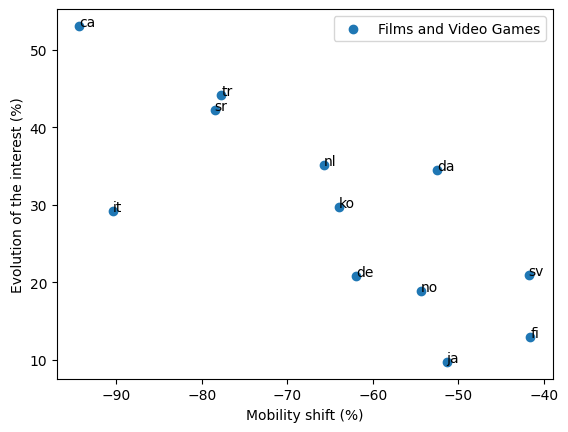

In [26]:
# Now we will focus on the last two lines of the matrix which correspond to video games and movies

# We will do a plot where each point represents a version of wikipedia, with the mobility shift in the associated country on the x-axis and the gain in interest in films and video games on the y-axis (weighted average of the two subjects).

# The x-axis will be the mobility shift
X = df_p4['mobility shift']*100

# In these two list we will put the total number of visits linked with films or video games in each country. This need to compute the weighted average in the next step.

films_total = []
videogames_total = []

for d in df_p4['country']:
    films_total.append(pd.Series(list(json_timeseries[d]['topics']['Culture.Media.Films']['sum'].values())).mean() + pd.Series(list(json_timeseries[d + '.m']['topics']['Culture.Media.Films']['sum'].values())).mean())
    videogames_total.append(pd.Series(list(json_timeseries[d]['topics']['Culture.Media.Video games']['sum'].values())).mean() + pd.Series(list(json_timeseries[d + '.m']['topics']['Culture.Media.Video games']['sum'].values())).mean())

films_total = np.array(films_total)
videogames_total = np.array(videogames_total)

# The y-axis is the average of the gain in interest in videogames and films weighted by the number of visits for these two topics
Y = (np.array(A[16, :]) * films_total + np.array(A[17,:]) * videogames_total) / (films_total + videogames_total)

plt.scatter(X, Y, label = 'Films and Video Games')
plt.xlabel('Mobility shift (%)')
plt.ylabel('Evolution of the interest (%)')

for i, txt in enumerate(df_p4['country']):
    plt.annotate(txt, (X[i], Y[i]))

plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:               interest   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     14.94
Date:                Thu, 22 Dec 2022   Prob (F-statistic):            0.00314
Time:                        16:43:26   Log-Likelihood:                -41.962
No. Observations:                  12   AIC:                             87.92
Df Residuals:                      10   BIC:                             88.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.1772     10.015     -0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


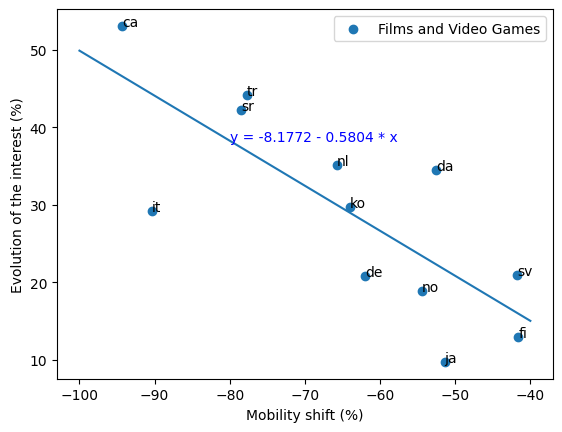

In [29]:
# Now we can do a linear regression to approximate the effect of the mobility shift in the interest in films and video games

import statsmodels.formula.api as smf
d = {'mobility_shift': X, 'interest': Y}
df_reglin = pd.DataFrame(data = d)

np.random.seed(2)

mod = smf.ols(formula='interest ~ mobility_shift', data=df_reglin)

res = mod.fit()

print(res.summary())

plt.scatter(X, Y, label = 'Films and Video Games')
plt.plot(np.linspace(-100,-40,3), [-8.1772 - 0.5804 * k for k in np.linspace(-100,-40,3)])
plt.text(-80, -8.1772 - 0.5804 * (-80), 'y = -8.1772 - 0.5804 * x', color = 'blue')
plt.xlabel('Mobility shift (%)')
plt.ylabel('Evolution of the interest (%)')

for i, txt in enumerate(df_p4['country']):
    plt.annotate(txt, (X[i], Y[i]))

plt.legend()
plt.show()